## K Means Clustering, Agglomerative Clustering, DBSCAN Clustering:
Objective :

1. Perform featurization BoW,TFIDF, Avg Word2Vec, tf-idf-Word2Vec.
2. At the end of the assignment, please elaborate on the step by step procedure you followed to solve the assignment.


# 2. Agglomerative Clustering:
1. Apply agglomerative algorithm and try a different number of clusters like 2,5 etc.
2. Same as that of K-means, plot word clouds for each cluster.
3. You can take around 5000 reviews or so(as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run.

### Step-By-Step procedure

1. In this, we need to work with all 4-vectorizers (BOW, TFIDF,Avg w2v and TF-IDF weighted w2v) where we will convert our texted review into numerical(vector) form in order to apply any Model on it.

2. After that we will take our cleandedtext(i.e cleand text means we have already cleaned our data by removing stops words, other this which are going to affect our model) and then we will take only test data not their respective class lable because as we know we are goint to apply K-means clustering algo which do not required class lables. what is does is it mainly group/clusters the similar data points

3. As we know Agglomerative is a Clustering algo but it works in different way that the k-means works. As we know Agglomerative clustering starts with each points beings a individual clusters and then it starts to group the clusters based on some sense of similirities/distance and so we dont need to give the or tune to getting best k as a hyperparameters and if we want n_clusters we can get it at that range. So we try to implement Agglomerative clustering with different number of clusters and try to see the reviews in the clusters 


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
#taking cleaned data i.e in Reviews table  from final sql database
#making connection with database 
conn = sqlite3.connect('final.sqlite') 
final = pd.read_sql_query(""" SELECT * FROM Reviews""", conn) 

C:\Users\nisha\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
final = final[:5000]
print(len(final))

5000


In [3]:
CleanedText = final['CleanedText'];
text=final.CleanedText.values    

In [4]:
from tqdm import tqdm
import os

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
import seaborn as sns; 

def cluster_wordcloud_generated_image_fun(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100,stopwords=stopwords ,background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
    

## Bow
Applying Bow vectorizer on data

In [5]:
#BOW 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10)
vocabulary= vectorizer.fit(text)
#print("the shape of out text BOW vectorizer ",vocabulary.get_shape())

bow_data= vectorizer.transform(text)
print("the shape of out text BOW vectorizer ",bow_data.get_shape())

the shape of out text BOW vectorizer  (5000, 2240)


### Agglomerative Clustering - Bow

######################### Agglomerative Clustering for Number of Clusters =  2    *************************

Reviews for each of the clusters : 

********************************************************************************
Cluster  1
********************************************************************************
Review -  1 And review Index No -  0
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


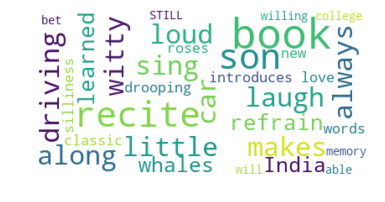



Review -  2 And review Index No -  1
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


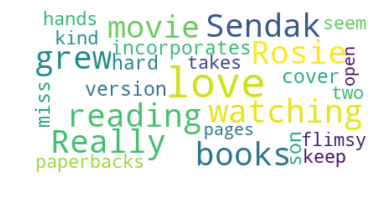



********************************************************************************
Cluster  2
********************************************************************************
Review -  1 And review Index No -  898
It was while at a friends home watching her use the grocery store food colour she had bought that I was reminded of why I love these Ateco full spectrum food colours. I am very very French in what I eat and how I bake and the products I need/want/use.<br /><br />Being a gel, you need less and the colours can be soft or bold.  If you are new to the gel I recommend using a toothpick to get a wee bit to mix in the dough, frosting, candy, cake, cookie you are making to better see if you actually need more.<br /><br />I love the violet for when I make my B&eacute;reng&egrave;re Abraham French macarons which calls for purple food colour to match the violet extract flavor.  Or green for when I make his Pistachio or  Kiwi macarons.  And the orange colour is magnificent and is used fo

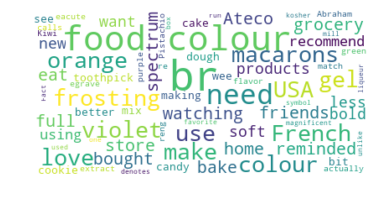



Review -  2 And review Index No -  1134
This kibble has been the staple diet of my 80 lb Great Dane Mix (named Kobe) for the past year. He came to me two years ago from a rescue group who transports black dogs from the southern U.S, where black dogs have a very high kill rate, to the nortern U.S. to be adopted. He was about 5 yrs old at the time I adopted him, sight unseen, from Arkansas.  Severe alleries were included among the miriad of issues that afflicted him. This manifested itself in runny eyes, full body skin yeast infection resulting in what the vet termed "elephant skin" on his abdomen, throat, elbows, and haunches.  Also bald spots over his neck, throat, thighs, and toes from constant scratching and biting at himself. In many places the "elepant skin" was perpetually split/cracked, infected, and bleeding.  After treating the bacterial and yeast infections with both topical and oral agents which did clear up the bacteria but left the yeast as a chronic secondary infection o

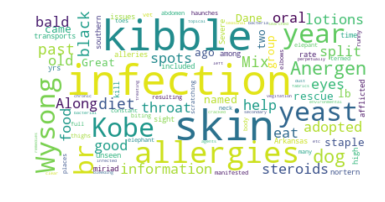



____________________________________________________________________________________________________



######################### Agglomerative Clustering for Number of Clusters =  3    *************************

Reviews for each of the clusters : 

********************************************************************************
Cluster  1
********************************************************************************
Review -  1 And review Index No -  0
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


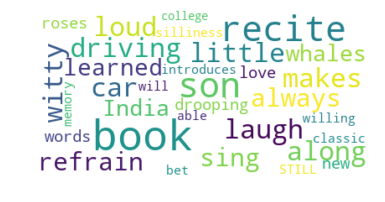



Review -  2 And review Index No -  1
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


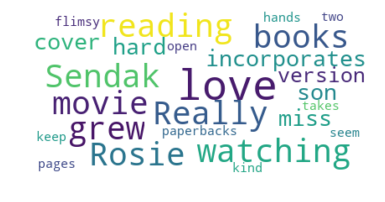



********************************************************************************
Cluster  2
********************************************************************************
Review -  1 And review Index No -  898
It was while at a friends home watching her use the grocery store food colour she had bought that I was reminded of why I love these Ateco full spectrum food colours. I am very very French in what I eat and how I bake and the products I need/want/use.<br /><br />Being a gel, you need less and the colours can be soft or bold.  If you are new to the gel I recommend using a toothpick to get a wee bit to mix in the dough, frosting, candy, cake, cookie you are making to better see if you actually need more.<br /><br />I love the violet for when I make my B&eacute;reng&egrave;re Abraham French macarons which calls for purple food colour to match the violet extract flavor.  Or green for when I make his Pistachio or  Kiwi macarons.  And the orange colour is magnificent and is used fo

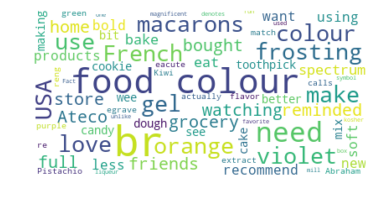



Review -  2 And review Index No -  1134
This kibble has been the staple diet of my 80 lb Great Dane Mix (named Kobe) for the past year. He came to me two years ago from a rescue group who transports black dogs from the southern U.S, where black dogs have a very high kill rate, to the nortern U.S. to be adopted. He was about 5 yrs old at the time I adopted him, sight unseen, from Arkansas.  Severe alleries were included among the miriad of issues that afflicted him. This manifested itself in runny eyes, full body skin yeast infection resulting in what the vet termed "elephant skin" on his abdomen, throat, elbows, and haunches.  Also bald spots over his neck, throat, thighs, and toes from constant scratching and biting at himself. In many places the "elepant skin" was perpetually split/cracked, infected, and bleeding.  After treating the bacterial and yeast infections with both topical and oral agents which did clear up the bacteria but left the yeast as a chronic secondary infection o

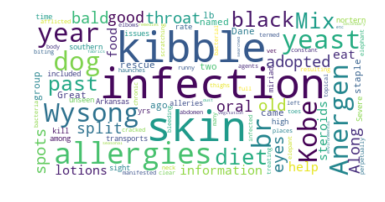



********************************************************************************
Cluster  3
********************************************************************************
Review -  1 And review Index No -  439
This was the biggest waste of our money.  I don't know what the solution is, but this trap is not it.  The so called "spikes" are not sharp enough to even penetrate my hand when triggered, much less something as small as a mole. When you pull the trap up, you don't know if you got the mole, because, unless you plan on digging up your yard to see if the mole might be there, you don't know.  We emailed the moleman, and he said that we needed to stick a piece of wood under the trap so that when the "spikes" come down, they do not just trap the mole.  So the past 6 times this trap has gone off, we have caught the mole, only to pull the trap out and set him free.  No where on the box or in the directions does it state the detail that needs to be taken.  I say, either live with em,

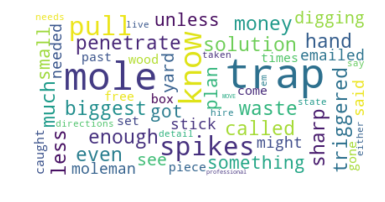



Review -  2 And review Index No -  441
This gopher trap is designed poorly.  We have gophers and bought this trap online.  The only problem is that the part that should come down and trap/kill the gopher gets stuck with the dirt when you set the trap up.  I'm not sure if we didn't dig down far enough or what the problem was, but the gopher issue was not solved with this product.


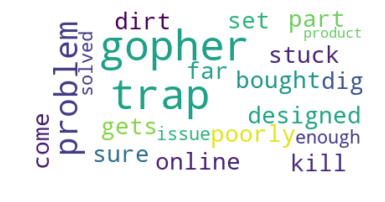



____________________________________________________________________________________________________



######################### Agglomerative Clustering for Number of Clusters =  5    *************************

Reviews for each of the clusters : 

********************************************************************************
Cluster  1
********************************************************************************
Review -  1 And review Index No -  0
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


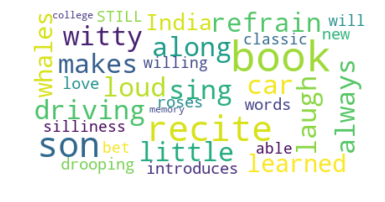



Review -  2 And review Index No -  1
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


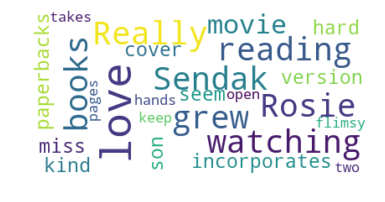



********************************************************************************
Cluster  2
********************************************************************************
Review -  1 And review Index No -  898
It was while at a friends home watching her use the grocery store food colour she had bought that I was reminded of why I love these Ateco full spectrum food colours. I am very very French in what I eat and how I bake and the products I need/want/use.<br /><br />Being a gel, you need less and the colours can be soft or bold.  If you are new to the gel I recommend using a toothpick to get a wee bit to mix in the dough, frosting, candy, cake, cookie you are making to better see if you actually need more.<br /><br />I love the violet for when I make my B&eacute;reng&egrave;re Abraham French macarons which calls for purple food colour to match the violet extract flavor.  Or green for when I make his Pistachio or  Kiwi macarons.  And the orange colour is magnificent and is used fo

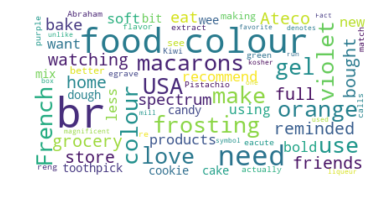



Review -  2 And review Index No -  1134
This kibble has been the staple diet of my 80 lb Great Dane Mix (named Kobe) for the past year. He came to me two years ago from a rescue group who transports black dogs from the southern U.S, where black dogs have a very high kill rate, to the nortern U.S. to be adopted. He was about 5 yrs old at the time I adopted him, sight unseen, from Arkansas.  Severe alleries were included among the miriad of issues that afflicted him. This manifested itself in runny eyes, full body skin yeast infection resulting in what the vet termed "elephant skin" on his abdomen, throat, elbows, and haunches.  Also bald spots over his neck, throat, thighs, and toes from constant scratching and biting at himself. In many places the "elepant skin" was perpetually split/cracked, infected, and bleeding.  After treating the bacterial and yeast infections with both topical and oral agents which did clear up the bacteria but left the yeast as a chronic secondary infection o

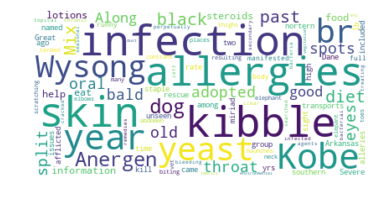



********************************************************************************
Cluster  3
********************************************************************************
Review -  1 And review Index No -  439
This was the biggest waste of our money.  I don't know what the solution is, but this trap is not it.  The so called "spikes" are not sharp enough to even penetrate my hand when triggered, much less something as small as a mole. When you pull the trap up, you don't know if you got the mole, because, unless you plan on digging up your yard to see if the mole might be there, you don't know.  We emailed the moleman, and he said that we needed to stick a piece of wood under the trap so that when the "spikes" come down, they do not just trap the mole.  So the past 6 times this trap has gone off, we have caught the mole, only to pull the trap out and set him free.  No where on the box or in the directions does it state the detail that needs to be taken.  I say, either live with em,

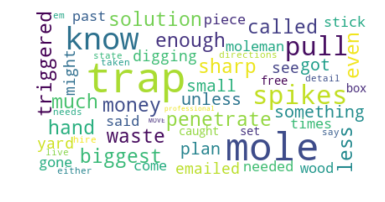



Review -  2 And review Index No -  441
This gopher trap is designed poorly.  We have gophers and bought this trap online.  The only problem is that the part that should come down and trap/kill the gopher gets stuck with the dirt when you set the trap up.  I'm not sure if we didn't dig down far enough or what the problem was, but the gopher issue was not solved with this product.


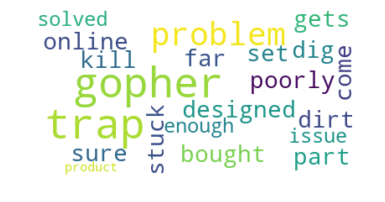



********************************************************************************
Cluster  4
********************************************************************************
Review -  1 And review Index No -  2224
It absolutely amazes me that some people spend over two dollars for a single cup of coffee, yet still buy those low cost tea bags from the grocery store, and then claim to like coffee better.  Many people have not tasted a real good cup of tea.  Good tea does not come in a 200 count per cardboard box - the tea should have higher quality and shouldn't be in a cheap cardboard box at all.  It should be in a sealed tin or packed in an airtight bag in order to preserve the flavor, and the leaves should be specially selected.  The cheapest teas are bought in bulk from the lowest quality teas parts of the tea leaf.  Yes, cost does matter in tea, just like coffee.<br /><br />Unless you're really lazy (which, I admit, I am), teas should also never, ever, be served from a bag.  Teas s

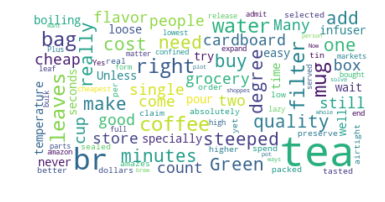



Review -  2 And review Index No -  2387
"There are few hours in life more agreeable than the hour dedicated to the ceremony known as afternoon tea." -Henry James, Portrait of a Lady<br /><br />This "English Breakfast" style tea is quite satisfying and has a darker color than most teas I've made. "Awake" will definitely encourage you to feel invigorated and inspired.<br /><br />I'd like to say that their teas are best steeped for an extra 5-10 minutes to draw out all the delicious flavors. I use my coffee maker to make tea. Simply put the loose tea in a coffee filter or the tea bags in the coffee pot, then allow the boiling water to drip over the tealeaves.<br /><br />When you drink these teas you can transcend reality for moments at a time and that is all the truth I need about these teas. Some of these teas even evoke a sense of wonder.<br /><br />Of all the black teas I've tried, Awake truly will keep you AWAKE. When I'm in the mood to write, this tea can jumpstart a very productiv

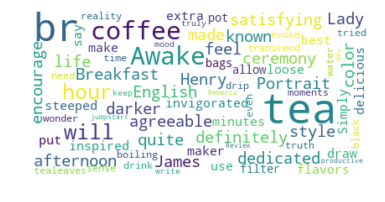



********************************************************************************
Cluster  5
********************************************************************************
Review -  1 And review Index No -  508
Hallelujah!!!  The wicked mole is dead.<br /><br />For 2 years I have hunted this critter.  I have read the entire internet.  2 years of research led me here.<br /><br />For those of you with mole problems, let me save you some time.  Forget everything you think you know.  The only way to deal with moles is to kill them.  The only way to kill them is to trap them.  Baits don't work.  Treating for grubs don't work.  Moles primarily feed on worms, not grubs.  Sonic vibration thingys don't work.  These traps work.<br /><br />BUT...<br /><br />Don't follow the directions on the package.  I will do my best to explain how to employ this product.<br /><br />First of all, if you have to, stamp down all mole runs in your yard.  Ordinarily, you don't want to do this, because it just en

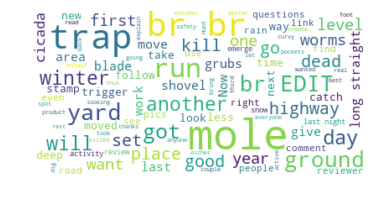



____________________________________________________________________________________________________





In [15]:
from sklearn.cluster import AgglomerativeClustering
reviews = final['Text'].values
n_clusters_lists = [2,3,5]

for cluster in n_clusters_lists:
    agclf = AgglomerativeClustering(n_clusters=cluster).fit(bow_data.toarray())
#   agclf.fit(bow_data)
    print("#" * 25, "Agglomerative Clustering for Number of Clusters = ", cluster, "  ", "*" * 25)
    print("\nReviews for each of the clusters : \n")
    
    lables = agclf.labels_
    # Printing two reviews from each cluster
    for i in range(cluster):
        review_count = 1 ;
        print("*" * 80)
        print("Cluster ",i+1);
        print("*" * 80)
        for j in range(agclf.labels_.shape[0]):
            if agclf.labels_[j] == i:
                if review_count == 3:
                    break;
                else:
                    print('Review - ',review_count,'And review Index No - ',j)
                    print(reviews[j])
                    cluster_wordcloud_generated_image_fun(reviews[j])
                    print('\n');
                    review_count = review_count+1;
#                 cluster_1.append(reviews[i])
            
            
    
    print("_" * 100)
    print("\n\n")
    

***** BOW ENDS *****

## TF-IDF

In [16]:
#tfidf 
# tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
tf_idf_vect = TfidfVectorizer()
vocabulary = tf_idf_vect.fit(text)
#print("the shape of out text TF-IDF vectorizer ",tf_idf_x_tr.get_shape())
tf_idf_data = tf_idf_vect.transform(text)
print("the shape of out text TF-IDF vectorizer ",tf_idf_data.get_shape())

the shape of out text TF-IDF vectorizer  (5000, 10429)


### AgglomerativeClustering - TF-IDF 
Apply agglomerative algorithm and try a different number of clusters 

######################### Agglomerative Clustering for Number of Clusters =  2    *************************

Reviews for each of the clusters : 

********************************************************************************
Cluster  1
********************************************************************************
Review -  1 And review Index No -  0
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


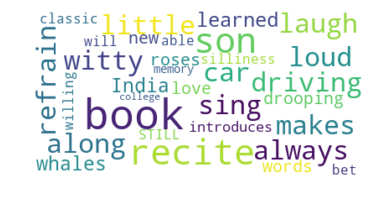



Review -  2 And review Index No -  1
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


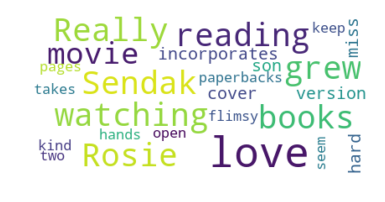



********************************************************************************
Cluster  2
********************************************************************************
Review -  1 And review Index No -  35
Our dogs just love them.  I saw them in a pet store and a tag was attached regarding them being made in China and it satisfied me that they were safe.


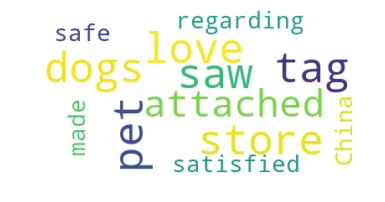



Review -  2 And review Index No -  36
My dogs loves this chicken but its a product from China, so we wont be buying it anymore.  Its very hard to find any chicken products made in the USA but they are out there, but this one isnt.  Its too bad too because its a good product but I wont take any chances till they know what is going on with the china imports.


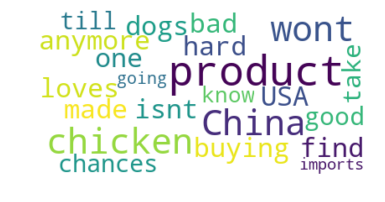



____________________________________________________________________________________________________



######################### Agglomerative Clustering for Number of Clusters =  3    *************************

Reviews for each of the clusters : 

********************************************************************************
Cluster  1
********************************************************************************
Review -  1 And review Index No -  0
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


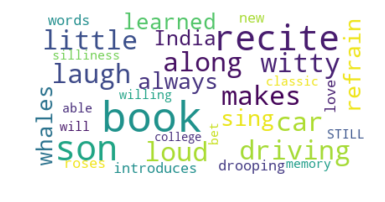



Review -  2 And review Index No -  1
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


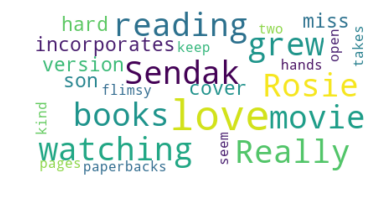



********************************************************************************
Cluster  2
********************************************************************************
Review -  1 And review Index No -  35
Our dogs just love them.  I saw them in a pet store and a tag was attached regarding them being made in China and it satisfied me that they were safe.


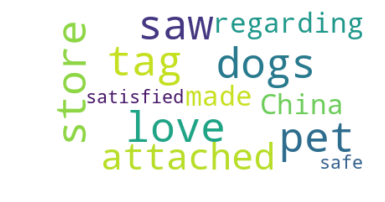



Review -  2 And review Index No -  36
My dogs loves this chicken but its a product from China, so we wont be buying it anymore.  Its very hard to find any chicken products made in the USA but they are out there, but this one isnt.  Its too bad too because its a good product but I wont take any chances till they know what is going on with the china imports.


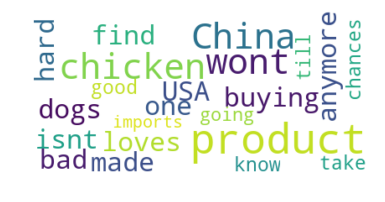



********************************************************************************
Cluster  3
********************************************************************************
Review -  1 And review Index No -  138
Love this faucet.  My husband had installed the same one in our old house so when our current faucet was leaking I told him not to fix it and we would buy the same one.  It was easy enough for him to install but he did need my assistance a few times to help hold some things in place. Looks great and works great.


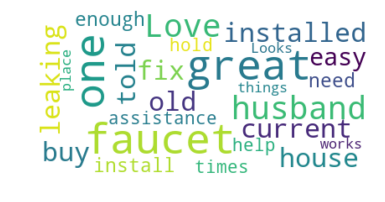



Review -  2 And review Index No -  204
What a horrible product. First of all the item does not work. I have had it up for a week with lots of flies around it and they simply avoid it. Infact the will sit on the window next to it but never go to it. Also it does no look like the one pictured You get the idea that there are small boxes for the flies to enter. Not so. Mine came with black and pink srips running from the top to the bottom. WASTE OF MONEY


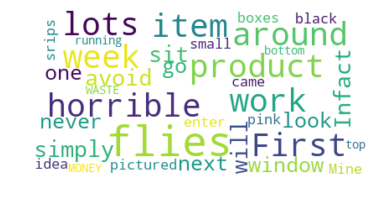



____________________________________________________________________________________________________



######################### Agglomerative Clustering for Number of Clusters =  5    *************************

Reviews for each of the clusters : 

********************************************************************************
Cluster  1
********************************************************************************
Review -  1 And review Index No -  35
Our dogs just love them.  I saw them in a pet store and a tag was attached regarding them being made in China and it satisfied me that they were safe.


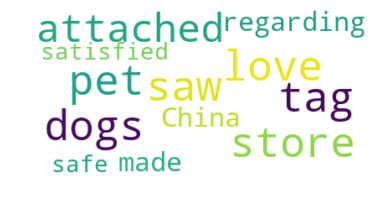



Review -  2 And review Index No -  36
My dogs loves this chicken but its a product from China, so we wont be buying it anymore.  Its very hard to find any chicken products made in the USA but they are out there, but this one isnt.  Its too bad too because its a good product but I wont take any chances till they know what is going on with the china imports.


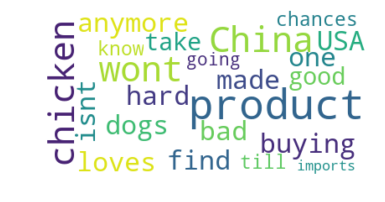



********************************************************************************
Cluster  2
********************************************************************************
Review -  1 And review Index No -  0
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


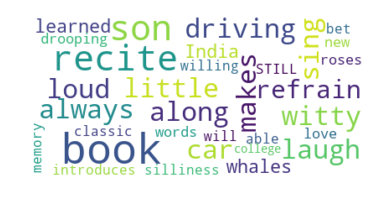



Review -  2 And review Index No -  1
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


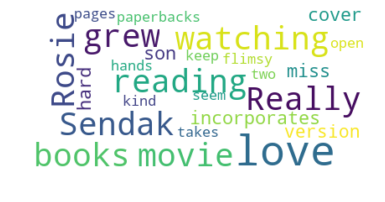



********************************************************************************
Cluster  3
********************************************************************************
Review -  1 And review Index No -  138
Love this faucet.  My husband had installed the same one in our old house so when our current faucet was leaking I told him not to fix it and we would buy the same one.  It was easy enough for him to install but he did need my assistance a few times to help hold some things in place. Looks great and works great.


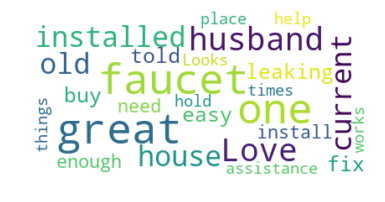



Review -  2 And review Index No -  204
What a horrible product. First of all the item does not work. I have had it up for a week with lots of flies around it and they simply avoid it. Infact the will sit on the window next to it but never go to it. Also it does no look like the one pictured You get the idea that there are small boxes for the flies to enter. Not so. Mine came with black and pink srips running from the top to the bottom. WASTE OF MONEY


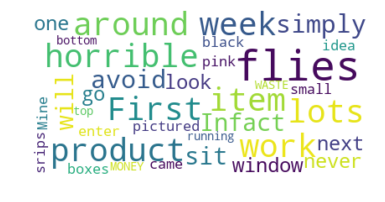



********************************************************************************
Cluster  4
********************************************************************************
Review -  1 And review Index No -  904
It's just as described. Its minty, helps with my mild-dry mouth and provides refreshment.<br />I'd recommend and/or purchase this again.


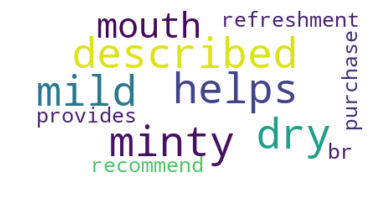



Review -  2 And review Index No -  906
As soon as I take a sip or two I can feel a sort of wash and openness in my lungs.  Definitely causes one to "breathe easy."  Have a hot tea or add a tea bag or two to your iced tea bags.  Very healthy stuff in there.


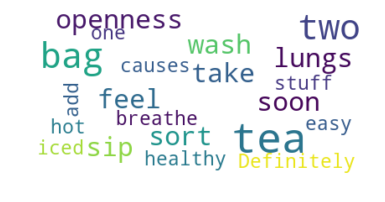



********************************************************************************
Cluster  5
********************************************************************************
Review -  1 And review Index No -  891
I am an average baker and used these for cupcake icing.  So far I am extremely pleased.  One single drop colored about a cup of white frosting a pleasing pink.  In an attempt to get black, I used 7 or 8 drops of black but ended up with dark grey.  A few more drops would have probably done it. Each bottle is 3/4 of an ounce but using them one drop at a time should make them last for years.  These do not compare to the store bought mccormick coloring- I will never buy them again!


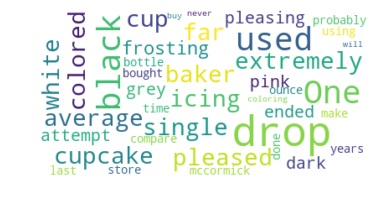



Review -  2 And review Index No -  1228
At first I had a hard time removing these lids from small cans such as Fancy Feast.  The solution is to just add hot water to a bowl and set the can in the bowl.  This takes the chill off the cat food and also makes the lid easier to remove.  (The cats don't like cold food and they don't like the microwave method!!)


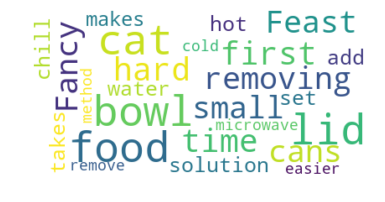



____________________________________________________________________________________________________





In [17]:
from sklearn.cluster import AgglomerativeClustering
reviews = final['Text'].values
n_clusters_lists = [2,3,5]

for cluster in n_clusters_lists:
    agclf = AgglomerativeClustering(n_clusters=cluster).fit(tf_idf_data.toarray())
#     agclf.fit(tf_idf_data)
    print("#" * 25, "Agglomerative Clustering for Number of Clusters = ", cluster, "  ", "*" * 25)
    print("\nReviews for each of the clusters : \n")
    
    lables = agclf.labels_
    # Printing two reviews from each cluster
    for i in range(cluster):
        review_count = 1 ;
        print("*" * 80)
        print("Cluster ",i+1);
        print("*" * 80)
        for j in range(agclf.labels_.shape[0]):
            if agclf.labels_[j] == i:
                if review_count == 3:
                    break;
                else:
                    print('Review - ',review_count,'And review Index No - ',j)
                    print(reviews[j])
                    cluster_wordcloud_generated_image_fun(reviews[j])
                    print('\n');
                    review_count = review_count+1;
#                 cluster_1.append(reviews[i])
            
            
    
    print("_" * 100)
    print("\n\n")
    

******* TF-IDF ENDS *****

## Word2Vec

In [18]:
#Word2Vec mode 
#spliting train sentence in words 
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sent=[]
for sent in text:
    list_of_sent.append(sent.split())
    
print(len(text))
# print("\n--------------Spliting each sentence into words--------word list of ie data corpus---------\n")
# print(X_tr_list_of_sent[:2])
#word list of ie data corpus

5000


In [19]:
#The Word to Vec model produces a vocabulary, with each word being represented by 
#an n-dimensional numpy array 
data_w2v_model=Word2Vec(list_of_sent,min_count=1,size=50, workers=4)
data_w2v_model.wv['man']
wlist =list(data_w2v_model.wv.vocab)
# wlist is a list of words 
len(wlist)

10429

In [20]:
#CALCULATE AVG WORD2VEC FOR data
w2v_words = list(data_w2v_model.wv.vocab)
# compute average word2vec for each review.
data_sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = data_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    data_sent_vectors.append(sent_vec)
print(len(data_sent_vectors))
print(len(data_sent_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:11<00:00, 431.14it/s]


5000
50


### AgglomerativeClustering - AVG WORD2VEC

######################### Agglomerative Clustering for Number of Clusters =  2    *************************

Reviews for each of the clusters : 

********************************************************************************
Cluster  1
********************************************************************************
Review -  1 And review Index No -  3
This is a great little book to read aloud- it has a nice rhythm as well as good repetition that little ones like, in the lines about "chicken soup with rice".  The child gets to go through the months of the year and go to wonderful places like Bombay and down the Nile, all the while, eating, well, you know what they get to eat.  Some kids will have Maurice Sendak's version of ice skating or how to treat roses in their heads for a long time and they won't even know where it came from.  Surprise!  It came from this little witty book.  :-)


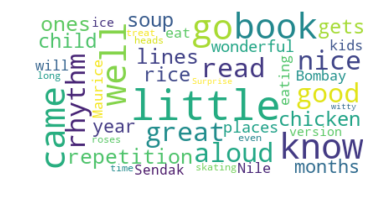



Review -  2 And review Index No -  4
This is a book of poetry about the months of the year.  It goes through each month and has a cute little poem to go along with it.  I love this book because it is a really fun way to learn the months and the poems are very creative. The author's purpose for writing this book was to give children a fun way to learn the months.  The children can also learn things about poetry and rhythm through reading this book.


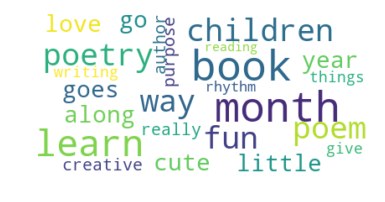



********************************************************************************
Cluster  2
********************************************************************************
Review -  1 And review Index No -  0
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


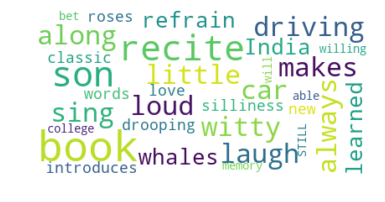



Review -  2 And review Index No -  1
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


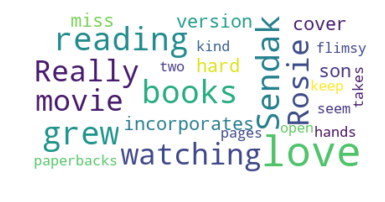



____________________________________________________________________________________________________



######################### Agglomerative Clustering for Number of Clusters =  3    *************************

Reviews for each of the clusters : 

********************************************************************************
Cluster  1
********************************************************************************
Review -  1 And review Index No -  3
This is a great little book to read aloud- it has a nice rhythm as well as good repetition that little ones like, in the lines about "chicken soup with rice".  The child gets to go through the months of the year and go to wonderful places like Bombay and down the Nile, all the while, eating, well, you know what they get to eat.  Some kids will have Maurice Sendak's version of ice skating or how to treat roses in their heads for a long time and they won't even know where it came from.  Surprise!  It came from this little witty book. 

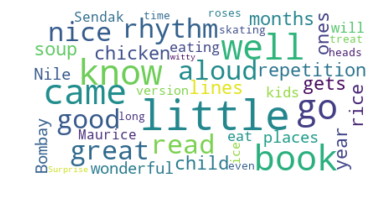



Review -  2 And review Index No -  4
This is a book of poetry about the months of the year.  It goes through each month and has a cute little poem to go along with it.  I love this book because it is a really fun way to learn the months and the poems are very creative. The author's purpose for writing this book was to give children a fun way to learn the months.  The children can also learn things about poetry and rhythm through reading this book.


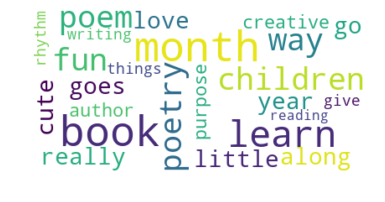



********************************************************************************
Cluster  2
********************************************************************************
Review -  1 And review Index No -  0
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


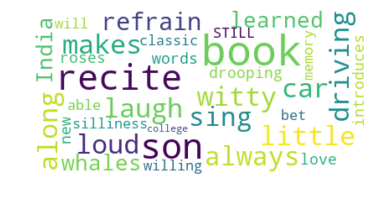



Review -  2 And review Index No -  1
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


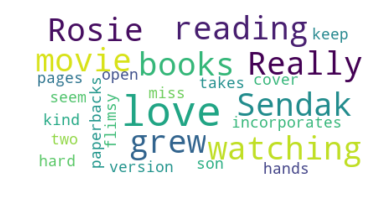



********************************************************************************
Cluster  3
********************************************************************************
Review -  1 And review Index No -  34
This product by Archer Farms is the best drink mix ever. Just mix a flavored packet with your 16 oz. water bottle. Contains the all natural sweetner Stevia, real fruit flavoring and no food coloring. Just colored with fruit or vegetable colors. Pure and natural and tastes great. There are eight packets in a box and only contains 10 calories per packet. Thank you Archer Farms!


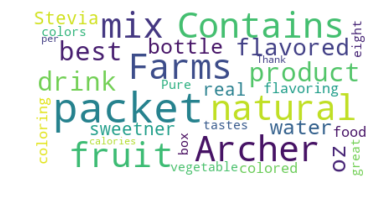



Review -  2 And review Index No -  107
My pitbull, Sammy, loves these treats! they are useful for training as well as do not make her breath smell overly bad.


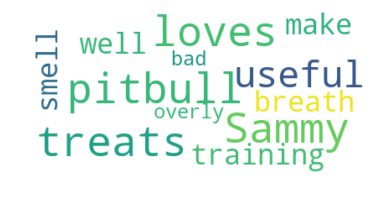



____________________________________________________________________________________________________



######################### Agglomerative Clustering for Number of Clusters =  5    *************************

Reviews for each of the clusters : 

********************************************************************************
Cluster  1
********************************************************************************
Review -  1 And review Index No -  34
This product by Archer Farms is the best drink mix ever. Just mix a flavored packet with your 16 oz. water bottle. Contains the all natural sweetner Stevia, real fruit flavoring and no food coloring. Just colored with fruit or vegetable colors. Pure and natural and tastes great. There are eight packets in a box and only contains 10 calories per packet. Thank you Archer Farms!


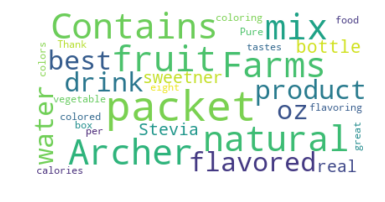



Review -  2 And review Index No -  107
My pitbull, Sammy, loves these treats! they are useful for training as well as do not make her breath smell overly bad.


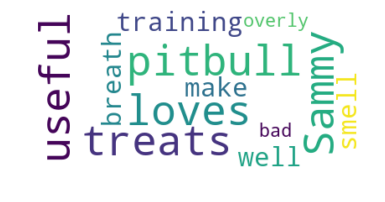



********************************************************************************
Cluster  2
********************************************************************************
Review -  1 And review Index No -  9
This book is a family favorite and was read to my children over and over again when they were small.  We ordered it for a new mom-to-be so that she and her family can enjoy it too!


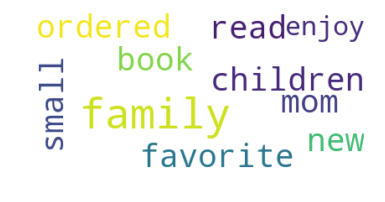



Review -  2 And review Index No -  12
Great book, perfect condition arrived in a short amount of time, long before the expected delivery date


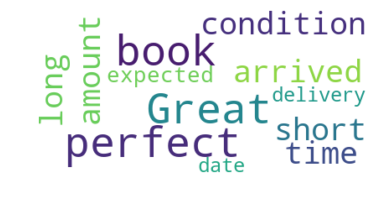



********************************************************************************
Cluster  3
********************************************************************************
Review -  1 And review Index No -  3
This is a great little book to read aloud- it has a nice rhythm as well as good repetition that little ones like, in the lines about "chicken soup with rice".  The child gets to go through the months of the year and go to wonderful places like Bombay and down the Nile, all the while, eating, well, you know what they get to eat.  Some kids will have Maurice Sendak's version of ice skating or how to treat roses in their heads for a long time and they won't even know where it came from.  Surprise!  It came from this little witty book.  :-)


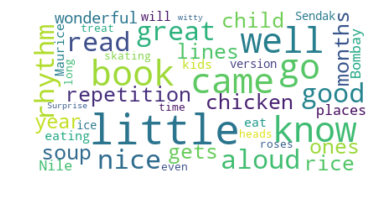



Review -  2 And review Index No -  4
This is a book of poetry about the months of the year.  It goes through each month and has a cute little poem to go along with it.  I love this book because it is a really fun way to learn the months and the poems are very creative. The author's purpose for writing this book was to give children a fun way to learn the months.  The children can also learn things about poetry and rhythm through reading this book.


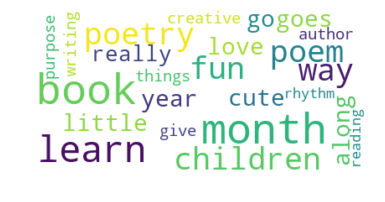



********************************************************************************
Cluster  4
********************************************************************************
Review -  1 And review Index No -  0
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


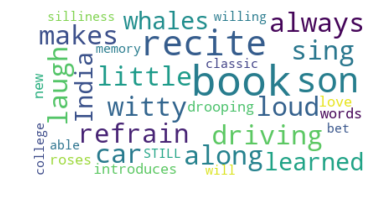



Review -  2 And review Index No -  1
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


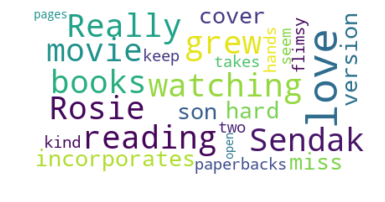



********************************************************************************
Cluster  5
********************************************************************************
Review -  1 And review Index No -  37
This book is easy to read and the ingredients are available in stores unlike some recipe books where you have to go to special stores to find ingredients. I use it to make food not only for my son but for myself!  The only thing I wish was that there were more recipes like these.  It is great for any one who likes a healthy and yummy snack.


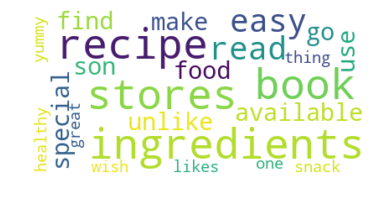



Review -  2 And review Index No -  46
This is the only dog treat that my terrier will eat. We crumble over his dry food and he LOVES it.


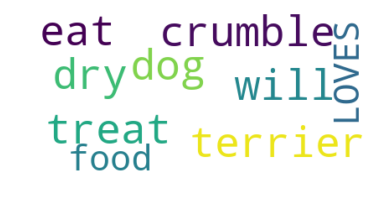



____________________________________________________________________________________________________





In [22]:
from sklearn.cluster import AgglomerativeClustering
reviews = final['Text'].values
n_clusters_lists = [2,3,5]

for cluster in n_clusters_lists:
    agclf = AgglomerativeClustering(n_clusters=cluster).fit(data_sent_vectors)
#     agclf.fit(tf_idf_data)
    print("#" * 25, "Agglomerative Clustering for Number of Clusters = ", cluster, "  ", "*" * 25)
    print("\nReviews for each of the clusters : \n")
    
    lables = agclf.labels_
    # Printing two reviews from each cluster
    for i in range(cluster):
        review_count = 1 ;
        print("*" * 80)
        print("Cluster ",i+1);
        print("*" * 80)
        for j in range(agclf.labels_.shape[0]):
            if agclf.labels_[j] == i:
                if review_count == 3:
                    break;
                else:
                    print('Review - ',review_count,'And review Index No - ',j)
                    print(reviews[j])
                    cluster_wordcloud_generated_image_fun(reviews[j])
                    print('\n');
                    review_count = review_count+1;
#                 cluster_1.append(reviews[i])
    
    print("_" * 100)
    print("\n\n")
    

******AVG W2V ENDS*****

## TF-IDF weighted Word2Vec

In [23]:
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tf_idf_vect.get_feature_names(), list(tf_idf_vect.idf_)))

In [24]:
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

data_tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = data_w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    data_tfidf_sent_vectors.append(sent_vec)
    row += 1

print(len(data_tfidf_sent_vectors))
print(len(data_tfidf_sent_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:14<00:00, 354.22it/s]


5000
50


### AgglomerativeClustering - TF-IDF weighted Word2Vec

######################### Agglomerative Clustering for Number of Clusters =  2    *************************

Reviews for each of the clusters : 

********************************************************************************
Cluster  1
********************************************************************************
Review -  1 And review Index No -  3
This is a great little book to read aloud- it has a nice rhythm as well as good repetition that little ones like, in the lines about "chicken soup with rice".  The child gets to go through the months of the year and go to wonderful places like Bombay and down the Nile, all the while, eating, well, you know what they get to eat.  Some kids will have Maurice Sendak's version of ice skating or how to treat roses in their heads for a long time and they won't even know where it came from.  Surprise!  It came from this little witty book.  :-)


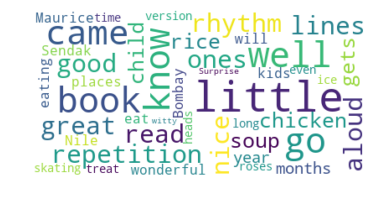



Review -  2 And review Index No -  4
This is a book of poetry about the months of the year.  It goes through each month and has a cute little poem to go along with it.  I love this book because it is a really fun way to learn the months and the poems are very creative. The author's purpose for writing this book was to give children a fun way to learn the months.  The children can also learn things about poetry and rhythm through reading this book.


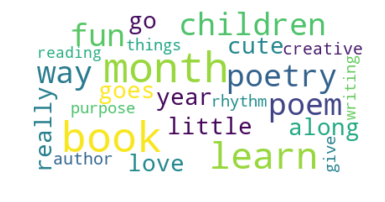



********************************************************************************
Cluster  2
********************************************************************************
Review -  1 And review Index No -  0
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


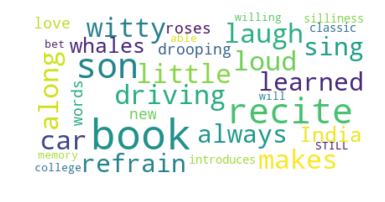



Review -  2 And review Index No -  1
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


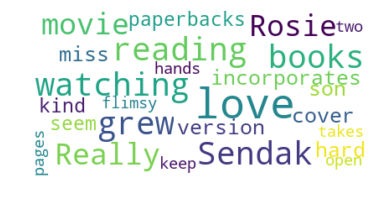



____________________________________________________________________________________________________



######################### Agglomerative Clustering for Number of Clusters =  3    *************************

Reviews for each of the clusters : 

********************************************************************************
Cluster  1
********************************************************************************
Review -  1 And review Index No -  3
This is a great little book to read aloud- it has a nice rhythm as well as good repetition that little ones like, in the lines about "chicken soup with rice".  The child gets to go through the months of the year and go to wonderful places like Bombay and down the Nile, all the while, eating, well, you know what they get to eat.  Some kids will have Maurice Sendak's version of ice skating or how to treat roses in their heads for a long time and they won't even know where it came from.  Surprise!  It came from this little witty book. 

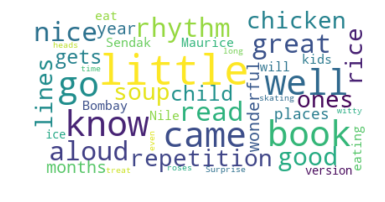



Review -  2 And review Index No -  4
This is a book of poetry about the months of the year.  It goes through each month and has a cute little poem to go along with it.  I love this book because it is a really fun way to learn the months and the poems are very creative. The author's purpose for writing this book was to give children a fun way to learn the months.  The children can also learn things about poetry and rhythm through reading this book.


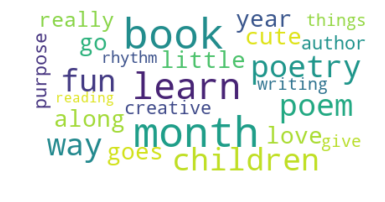



********************************************************************************
Cluster  2
********************************************************************************
Review -  1 And review Index No -  0
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


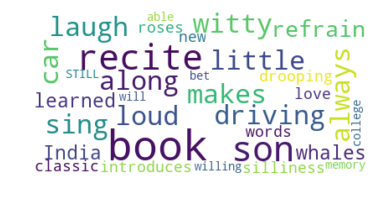



Review -  2 And review Index No -  1
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


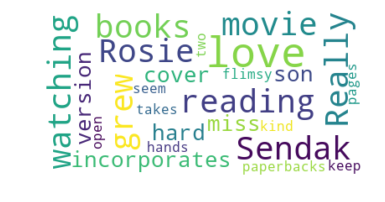



********************************************************************************
Cluster  3
********************************************************************************
Review -  1 And review Index No -  9
This book is a family favorite and was read to my children over and over again when they were small.  We ordered it for a new mom-to-be so that she and her family can enjoy it too!


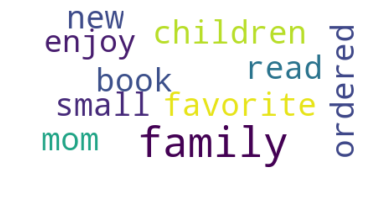



Review -  2 And review Index No -  12
Great book, perfect condition arrived in a short amount of time, long before the expected delivery date


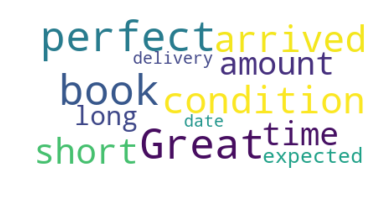



____________________________________________________________________________________________________



######################### Agglomerative Clustering for Number of Clusters =  5    *************************

Reviews for each of the clusters : 

********************************************************************************
Cluster  1
********************************************************************************
Review -  1 And review Index No -  77
Extremely big bucket of yummy treats for training! This is a great value. The pieces are large, but I cut them up into smaller pieces for regular training purposes.


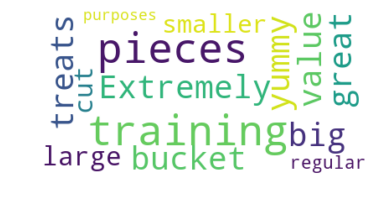



Review -  2 And review Index No -  87
We tried everything including cheese, chicken & hot dogs and this is the only one he will eat.


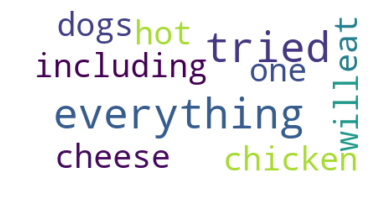



********************************************************************************
Cluster  2
********************************************************************************
Review -  1 And review Index No -  0
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


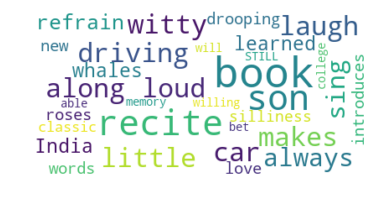



Review -  2 And review Index No -  1
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


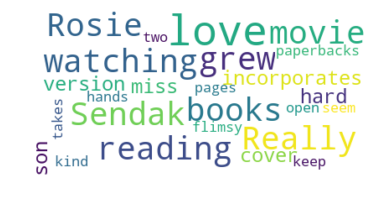



********************************************************************************
Cluster  3
********************************************************************************
Review -  1 And review Index No -  9
This book is a family favorite and was read to my children over and over again when they were small.  We ordered it for a new mom-to-be so that she and her family can enjoy it too!


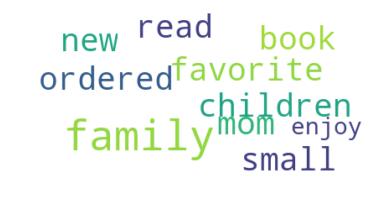



Review -  2 And review Index No -  12
Great book, perfect condition arrived in a short amount of time, long before the expected delivery date


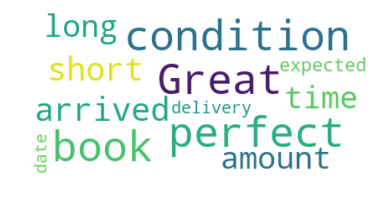



********************************************************************************
Cluster  4
********************************************************************************
Review -  1 And review Index No -  3
This is a great little book to read aloud- it has a nice rhythm as well as good repetition that little ones like, in the lines about "chicken soup with rice".  The child gets to go through the months of the year and go to wonderful places like Bombay and down the Nile, all the while, eating, well, you know what they get to eat.  Some kids will have Maurice Sendak's version of ice skating or how to treat roses in their heads for a long time and they won't even know where it came from.  Surprise!  It came from this little witty book.  :-)


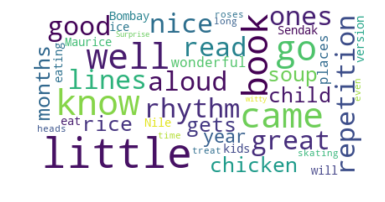



Review -  2 And review Index No -  4
This is a book of poetry about the months of the year.  It goes through each month and has a cute little poem to go along with it.  I love this book because it is a really fun way to learn the months and the poems are very creative. The author's purpose for writing this book was to give children a fun way to learn the months.  The children can also learn things about poetry and rhythm through reading this book.


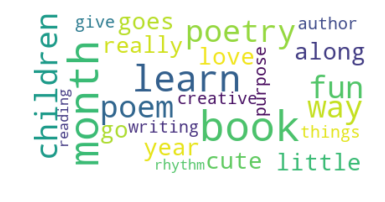



********************************************************************************
Cluster  5
********************************************************************************
Review -  1 And review Index No -  38
I have been feeding my greyhounds these treats for years.  My hounds can be a little finicky, but they love these treats.  They are expensive, relative to other biscuits, but I find they are a good addition to their diet.  The treats are easy on the teeth.  Since they are protein treat, be careful not to overindulge your pet on a regular basis.  They are great treats to take on walks as you can stuff them in your pocket easily.  I have found prices can vary from vendor to vendor, so shop around.


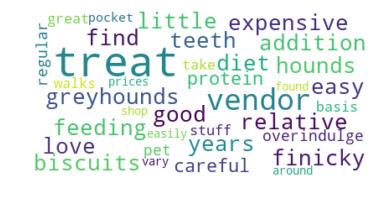



Review -  2 And review Index No -  42
This was the only treat my dog liked during obedience training and it has remained her favorite ever since.  I haven't met a dog that didn't like this treat!


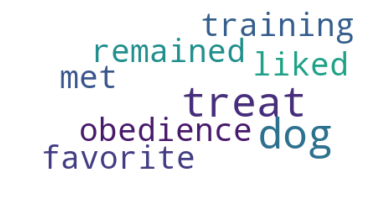



____________________________________________________________________________________________________





In [25]:
from sklearn.cluster import AgglomerativeClustering
reviews = final['Text'].values
n_clusters_lists = [2,3,5]

for cluster in n_clusters_lists:
    agclf = AgglomerativeClustering(n_clusters=cluster).fit(data_tfidf_sent_vectors)
#     agclf.fit(tf_idf_data)
    print("#" * 25, "Agglomerative Clustering for Number of Clusters = ", cluster, "  ", "*" * 25)
    print("\nReviews for each of the clusters : \n")
    
    lables = agclf.labels_
    # Printing two reviews from each cluster
    for i in range(cluster):
        review_count = 1 ;
        print("*" * 80)
        print("Cluster ",i+1);
        print("*" * 80)
        for j in range(agclf.labels_.shape[0]):
            if agclf.labels_[j] == i:
                if review_count == 3:
                    break;
                else:
                    print('Review - ',review_count,'And review Index No - ',j)
                    print(reviews[j])
                    cluster_wordcloud_generated_image_fun(reviews[j])
                    print('\n');
                    review_count = review_count+1;
#                 cluster_1.append(reviews[i])
    
    print("_" * 100)
    print("\n\n")
    

## Conclusion